# Web crawler

In [3]:
import requests
import re
import json
from lxml import etree
headers = {
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36'
}
url ='https://www.bilibili.com/bangumi/play/ep28931?from_spmid=666.19.0.0'
resp = requests.get(url, headers=headers)
print(resp.status_code)
text = resp.content.decode('utf-8')
result = re.findall(r'window.__INITIAL_STATE__=(.*?);', text)
comment_data = {}
if result:
    data = json.loads(result[0])
    epList = data.get('epList', [])
    for item in epList:
        cid = item.get('cid')
        comment_data[cid] = []
        url = f"https://comment.bilibili.com/{cid}.xml"
        res = requests.get(url)
        xml_data = res.content
        with open(f'./{cid}.xml', 'wb') as f:
            f.write(xml_data)
        soup = etree.HTML(xml_data)
        content_all = soup.xpath('//d')
        for content in content_all:
            data = content.xpath('string(.)')
            p = content.xpath('./@p')
            if not p:
                continue
            p = p[0]
            bullet_chat_time, _type, size, color, send_time, pool, uid, row_id, other = p.split(',')
            data = content.xpath('string(.)')
            comment_data[cid].append({
                "bullet_chat_time": bullet_chat_time,
                "type": _type,
                "size": size,
                "color": color,
                "send_time": send_time,
                "pool": pool,
                "uid": uid,
                "row_id": row_id,
                "other": other,
                "message": data
            })
            
with open('食戟之灵', 'w', encoding='utf-8') as f:
    f.write(json.dumps(comment_data, indent=4, ensure_ascii=False))


200


# word cloud

In [10]:

import requests
from lxml import etree
import jieba
from pyecharts.charts import WordCloud
url = "https://comment.bilibili.com/3384256.xml"
# headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36"}
res = requests.get(url)

xml = res.content
soup = etree.HTML(xml)
content_all = soup.xpath('//d')

#Crawl the Danmaku for word segmentation
wordList = []
for content in content_all:
    data = content.xpath('string(.)')
    words = jieba.lcut(data)
    wordList = wordList+words
wordDict = {}
for word in wordList:
    if len(word) > 1:
        if word not in wordDict.keys():
            wordDict[word] = 1
        else:
            wordDict[word] = wordDict[word]+1

#Word cloud visualization
wordCloud = WordCloud()
wordCloud.add(series_name="", data_pair=wordDict.items(),word_size_range=[20,80])
wordCloud.render("wordCloud1.html")

'C:\\Users\\罗文慧\\project\\wordCloud1.html'

In [11]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [12]:
!pip install matplotlib -i https://pypi.tuna.tsinghua.edu.cn/simple/

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple/


# Danmaku real-time quantity

1448.6
0.0
864
第0分钟到第1分钟弹幕数: 76
第1分钟到第2分钟弹幕数: 33
第2分钟到第3分钟弹幕数: 42
第3分钟到第4分钟弹幕数: 42
第4分钟到第5分钟弹幕数: 32
第5分钟到第6分钟弹幕数: 23
第6分钟到第7分钟弹幕数: 54
第7分钟到第8分钟弹幕数: 32
第8分钟到第9分钟弹幕数: 33
第9分钟到第10分钟弹幕数: 20
第10分钟到第11分钟弹幕数: 57
第11分钟到第12分钟弹幕数: 37
第12分钟到第13分钟弹幕数: 34
第13分钟到第14分钟弹幕数: 28
第14分钟到第15分钟弹幕数: 35
第15分钟到第16分钟弹幕数: 25
第16分钟到第17分钟弹幕数: 39
第17分钟到第18分钟弹幕数: 49
第18分钟到第19分钟弹幕数: 26
第19分钟到第20分钟弹幕数: 28
第20分钟到第21分钟弹幕数: 23
第21分钟到第22分钟弹幕数: 42
第22分钟到第23分钟弹幕数: 19
第23分钟到第24分钟弹幕数: 32
第24分钟到第25分钟弹幕数: 3


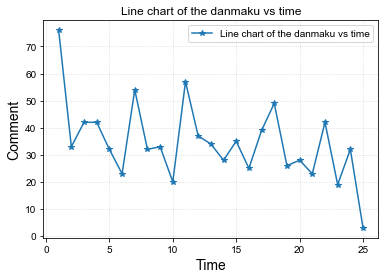

In [14]:
import json
import pandas as pd
from lxml import etree


with open('./3384256.xml', 'rb') as f:
    xml_data = f.read()

comment_list = []
soup = etree.HTML(xml_data)
content_all = soup.xpath('//d')
for content in content_all:
    p = content.xpath('./@p')
    if not p:
        continue
    p = p[0]
    bullet_chat_time, _type, size, color, send_time, pool, uid, row_id, other = p.split(',')
    data = content.xpath('string(.)')
    comment_list.append({
        "bullet_chat_time": bullet_chat_time,
        "type": _type,
        "size": size,
        "color": color,
        "send_time": send_time,
        "pool": pool,
        "uid": uid,
        "row_id": row_id,
        "other": other,
        "message": data
    })


with open('./r.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(comment_list, ensure_ascii=False, indent=4))

with open('./r.json',  encoding='utf-8') as f:
    data = f.read()

data = json.loads(data)
d_dict1 = {}

for item in data:
    for k, v in item.items():
        l1 = d_dict1.get(k, [])
        l1.append(v)
        d_dict1[k] = l1
t1 = 1 * 60
df = pd.DataFrame.from_dict(data)
df['bullet_chat_time'] = df['bullet_chat_time'].astype(float)
max_time = max(df['bullet_chat_time'])
print(max_time)
print(min(df['bullet_chat_time']))
print(df['bullet_chat_time'].shape[0])

title = []
number_list = []
for index, tt in enumerate(range(0, int(max_time), t1)):
    num = df['bullet_chat_time'][(df['bullet_chat_time'] >= tt) & (df['bullet_chat_time'] < (index + 1) * t1)].count()
    print(f"第{tt//60}分钟到第{(index + 1) * t1 // 60}分钟弹幕数: {num}")
    title.append((index + 1) * t1 // 60)
    number_list.append(num)

# from pyecharts.charts import *
#
# print(number_list)
# print(title)
# line = Line()
# line.add_xaxis(title)
# line.add_yaxis('时间', y_axis=number_list)
# line.render()

import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
fig, ax= plt.subplots()
ax.set_title('Line chart of the danmaku vs time')  
ax.set_xlabel("Time", fontsize=14)  
ax.set_ylabel("Comment", fontsize=14)  

ax.plot(title, number_list, marker='*', label=u'Line chart of the danmaku vs time')  # Abscissa data + ordinate data + legend


# ax.plot(input_values,lst_temp10,marker='o',label=u'十月份')

plt.legend()  # Make legend effective
# Add gridlines
plt.grid(True, alpha=0.5, axis='both', linestyle=':')
plt.show()


In [9]:
import numpy as np

In [8]:
uid = df.groupby("uid").agg({"send_time" :np.sum})

# Number of Danmaku sent by the user

In [9]:
uid

,send_time
uid,
100bf8d9,1649301536
1015c7c5,1647185206
1024f9b,1636778693
103966f1,1639282697
1055f79b,1632825818163282486916328247341632824537163282...
1057fc46,1650871510
1079455d,1650624525
10ac0bd8,1642249589
10b1b4d0,1650359595


In [10]:
data = {}
uid = df.groupby("uid")
for name, group in uid:
    key = len(group)
    val = data.get(f"{key}", 0)
    print(val)
    print(type(val))
    val += 1
    data[f"{key}"] = val

0
<class 'int'>
1
<class 'int'>
2
<class 'int'>
3
<class 'int'>
0
<class 'int'>
4
<class 'int'>
5
<class 'int'>
6
<class 'int'>
7
<class 'int'>
8
<class 'int'>
9
<class 'int'>
0
<class 'int'>
0
<class 'int'>
10
<class 'int'>
11
<class 'int'>
12
<class 'int'>
1
<class 'int'>
13
<class 'int'>
14
<class 'int'>
2
<class 'int'>
15
<class 'int'>
0
<class 'int'>
3
<class 'int'>
16
<class 'int'>
17
<class 'int'>
18
<class 'int'>
19
<class 'int'>
20
<class 'int'>
21
<class 'int'>
22
<class 'int'>
23
<class 'int'>
24
<class 'int'>
25
<class 'int'>
26
<class 'int'>
27
<class 'int'>
0
<class 'int'>
28
<class 'int'>
29
<class 'int'>
30
<class 'int'>
31
<class 'int'>
32
<class 'int'>
4
<class 'int'>
33
<class 'int'>
34
<class 'int'>
35
<class 'int'>
36
<class 'int'>
1
<class 'int'>
37
<class 'int'>
2
<class 'int'>
38
<class 'int'>
39
<class 'int'>
40
<class 'int'>
41
<class 'int'>
42
<class 'int'>
5
<class 'int'>
43
<class 'int'>
1
<class 'int'>
44
<class 'int'>
45
<class 'int'>
46
<class 'int'>
47


352
<class 'int'>
353
<class 'int'>
354
<class 'int'>
355
<class 'int'>
356
<class 'int'>
357
<class 'int'>
358
<class 'int'>
359
<class 'int'>
360
<class 'int'>
361
<class 'int'>
362
<class 'int'>
363
<class 'int'>
61
<class 'int'>
364
<class 'int'>
365
<class 'int'>
366
<class 'int'>
3
<class 'int'>
367
<class 'int'>
368
<class 'int'>
19
<class 'int'>
369
<class 'int'>
370
<class 'int'>
371
<class 'int'>
372
<class 'int'>
20
<class 'int'>
373
<class 'int'>
21
<class 'int'>
374
<class 'int'>
62
<class 'int'>
375
<class 'int'>
376
<class 'int'>
377
<class 'int'>
378
<class 'int'>
379
<class 'int'>
380
<class 'int'>
381
<class 'int'>
63
<class 'int'>
3
<class 'int'>
382
<class 'int'>
383
<class 'int'>
64
<class 'int'>
384
<class 'int'>
2
<class 'int'>
65
<class 'int'>
385
<class 'int'>
66
<class 'int'>
386
<class 'int'>
67
<class 'int'>
387
<class 'int'>
388
<class 'int'>
389
<class 'int'>
390
<class 'int'>
10
<class 'int'>
11
<class 'int'>
391
<class 'int'>
68
<class 'int'>
392
<class 

1074
<class 'int'>
1075
<class 'int'>
1076
<class 'int'>
201
<class 'int'>
1077
<class 'int'>
1078
<class 'int'>
1079
<class 'int'>
1080
<class 'int'>
1081
<class 'int'>
1082
<class 'int'>
1083
<class 'int'>
1084
<class 'int'>
202
<class 'int'>
1085
<class 'int'>
1086
<class 'int'>
1087
<class 'int'>
203
<class 'int'>
1088
<class 'int'>
1089
<class 'int'>
1090
<class 'int'>
1091
<class 'int'>
1092
<class 'int'>
1093
<class 'int'>
1094
<class 'int'>
1095
<class 'int'>
1096
<class 'int'>
1097
<class 'int'>
1098
<class 'int'>
74
<class 'int'>
1099
<class 'int'>
37
<class 'int'>
1100
<class 'int'>
1101
<class 'int'>
1102
<class 'int'>
1103
<class 'int'>
1104
<class 'int'>
1105
<class 'int'>
1106
<class 'int'>
1107
<class 'int'>
1108
<class 'int'>
1109
<class 'int'>
7
<class 'int'>
75
<class 'int'>
1110
<class 'int'>
1111
<class 'int'>
1112
<class 'int'>
1113
<class 'int'>
204
<class 'int'>
38
<class 'int'>
205
<class 'int'>
206
<class 'int'>
1114
<class 'int'>
1115
<class 'int'>
1116
<clas

319
<class 'int'>
1731
<class 'int'>
1732
<class 'int'>
1733
<class 'int'>
1734
<class 'int'>
1735
<class 'int'>
1736
<class 'int'>
1737
<class 'int'>
1738
<class 'int'>
1739
<class 'int'>
1740
<class 'int'>
105
<class 'int'>
1741
<class 'int'>
1742
<class 'int'>
1743
<class 'int'>
1744
<class 'int'>
320
<class 'int'>
1745
<class 'int'>
50
<class 'int'>
51
<class 'int'>
106
<class 'int'>
1746
<class 'int'>
107
<class 'int'>
108
<class 'int'>
321
<class 'int'>
1747
<class 'int'>
322
<class 'int'>
1748
<class 'int'>
1749
<class 'int'>
1750
<class 'int'>
1751
<class 'int'>
109
<class 'int'>
1752
<class 'int'>
1753
<class 'int'>
1754
<class 'int'>
1755
<class 'int'>
52
<class 'int'>
110
<class 'int'>
1756
<class 'int'>
1757
<class 'int'>
1758
<class 'int'>
1759
<class 'int'>
8
<class 'int'>
1760
<class 'int'>
1761
<class 'int'>
323
<class 'int'>
111
<class 'int'>
1762
<class 'int'>
53
<class 'int'>
1763
<class 'int'>
1764
<class 'int'>
324
<class 'int'>
1765
<class 'int'>
1766
<class 'int'

<class 'int'>
2355
<class 'int'>
2356
<class 'int'>
2357
<class 'int'>
2358
<class 'int'>
2359
<class 'int'>
2360
<class 'int'>
144
<class 'int'>
2361
<class 'int'>
429
<class 'int'>
2362
<class 'int'>
2363
<class 'int'>
2364
<class 'int'>
2365
<class 'int'>
2366
<class 'int'>
2367
<class 'int'>
2368
<class 'int'>
71
<class 'int'>
430
<class 'int'>
145
<class 'int'>
2369
<class 'int'>
72
<class 'int'>
2370
<class 'int'>
431
<class 'int'>
432
<class 'int'>
2371
<class 'int'>
433
<class 'int'>
2372
<class 'int'>
2373
<class 'int'>
18
<class 'int'>
2374
<class 'int'>
2375
<class 'int'>
2376
<class 'int'>
2377
<class 'int'>
434
<class 'int'>
435
<class 'int'>
2378
<class 'int'>
2379
<class 'int'>
2380
<class 'int'>
73
<class 'int'>
2381
<class 'int'>
2382
<class 'int'>
2383
<class 'int'>
2384
<class 'int'>
2385
<class 'int'>
2386
<class 'int'>
2387
<class 'int'>
2388
<class 'int'>
146
<class 'int'>
2389
<class 'int'>
2390
<class 'int'>
2391
<class 'int'>
2392
<class 'int'>
436
<class 'int'

<class 'int'>
2698
<class 'int'>
2699
<class 'int'>
2700
<class 'int'>
2701
<class 'int'>
2702
<class 'int'>
20
<class 'int'>
2703
<class 'int'>
2704
<class 'int'>
483
<class 'int'>
22
<class 'int'>
2705
<class 'int'>
2706
<class 'int'>
2707
<class 'int'>
2708
<class 'int'>
2709
<class 'int'>
2710
<class 'int'>
2711
<class 'int'>
2712
<class 'int'>
2713
<class 'int'>
2714
<class 'int'>
160
<class 'int'>
2715
<class 'int'>
2716
<class 'int'>
484
<class 'int'>
2717
<class 'int'>
2718
<class 'int'>
2719
<class 'int'>
161
<class 'int'>
2720
<class 'int'>
2721
<class 'int'>
15
<class 'int'>
485
<class 'int'>
486
<class 'int'>
90
<class 'int'>
2722
<class 'int'>
91
<class 'int'>
2723
<class 'int'>
2724
<class 'int'>
2725
<class 'int'>
2726
<class 'int'>
2727
<class 'int'>
2728
<class 'int'>
2729
<class 'int'>
2730
<class 'int'>
487
<class 'int'>
2731
<class 'int'>
2732
<class 'int'>
2733
<class 'int'>
2734
<class 'int'>
2735
<class 'int'>
2736
<class 'int'>
2737
<class 'int'>
2738
<class 'in

<class 'int'>
3318
<class 'int'>
3319
<class 'int'>
589
<class 'int'>
3320
<class 'int'>
3321
<class 'int'>
47
<class 'int'>
3322
<class 'int'>
3323
<class 'int'>
3324
<class 'int'>
3325
<class 'int'>
590
<class 'int'>
3326
<class 'int'>
0
<class 'int'>
3327
<class 'int'>
3328
<class 'int'>
3329
<class 'int'>
3330
<class 'int'>
3331
<class 'int'>
3332
<class 'int'>
3333
<class 'int'>
3334
<class 'int'>
3335
<class 'int'>
3336
<class 'int'>
3337
<class 'int'>
591
<class 'int'>
3338
<class 'int'>
3339
<class 'int'>
592
<class 'int'>
3340
<class 'int'>
3341
<class 'int'>
593
<class 'int'>
3342
<class 'int'>
3343
<class 'int'>
3344
<class 'int'>
31
<class 'int'>
3345
<class 'int'>
3346
<class 'int'>
3347
<class 'int'>
3348
<class 'int'>
202
<class 'int'>
3349
<class 'int'>
3350
<class 'int'>
3351
<class 'int'>
3352
<class 'int'>
3353
<class 'int'>
594
<class 'int'>
595
<class 'int'>
3354
<class 'int'>
3355
<class 'int'>
3356
<class 'int'>
203
<class 'int'>
596
<class 'int'>
597
<class 'int

In [11]:
data

{'1': 3455,
 '14': 2,
 '4': 105,
 '2': 613,
 '11': 4,
 '3': 213,
 '5': 50,
 '6': 32,
 '8': 12,
 '9': 18,
 '13': 5,
 '12': 9,
 '10': 5,
 '7': 24,
 '23': 1,
 '15': 3,
 '18': 1,
 '16': 1,
 '19': 1,
 '20': 1,
 '17': 3,
 '33': 1,
 '24': 1,
 '48': 1}

In [12]:
plt.show()

In [13]:
%matplotlib
%matplotlib inline

Using matplotlib backend: Qt5Agg


In [14]:
plt.show()